# NLP Project Codrel2n with dife approch


## Importing dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Clothes.csv')
df = dataset.copy()
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


### Data Cleaning

In [2]:
#Dropping columns
drop = ['Title','Review Text','Recommended IND']
df = df.drop(columns=[col for col in df.columns if not col in drop])
df.sample(5)

,Title,Review Text,Recommended IND
7254,Could not get it over my calves,These socks were very thin and the elastic at ...,0
7253,So great i bought it twice!,"I absolutely adore this cardigan. it's easy, s...",1
15793,Poor fabrication,"When i tried it on, it was a bit shapeless, bu...",0
3879,??this,"Adorable & comfortable. i'm 5'3"" and 115 lbs. ...",1
20567,This top looks amazing on the model- not me,I wanted to love this shirt. the fit was a lit...,0


In [3]:
#New Column
df['Title'].fillna(' ',inplace=True)
df['Review'] = df['Title']+' '+df['Review Text']
df.head(5)

,Title,Review Text,Recommended IND,Review
0,,Absolutely wonderful - silky and sexy and comf...,1,Absolutely wonderful - silky and sexy and co...
1,,Love this dress! it's sooo pretty. i happene...,1,Love this dress! it's sooo pretty. i happe...
2,Some major design flaws,I had such high hopes for this dress and reall...,0,Some major design flaws I had such high hopes ...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,"My favorite buy! I love, love, love this jumps..."
4,Flattering shirt,This shirt is very flattering to all due to th...,1,Flattering shirt This shirt is very flattering...


Replace na with space and add space btw both columns


In [4]:
#Dropping NUll Values
df.dropna(inplace=True)
df.isna().sum()

Title              0
Review Text        0
Recommended IND    0
Review             0
dtype: int64

## Text Cleaning


In [5]:
#Droping Irrelevant columns
data = df.copy()
listy = ['Review']
data.drop(columns=[col for col in data.columns if not col in listy],inplace=True)
data.shape

(22641, 1)

In [6]:
#Assigning new index
data.sample(3)
data['Serial'] = range(len(data))
data.set_index('Serial',inplace= True)
data.sample(4)

,Review
Serial,
13025,Beautiful sweater This sweater is absolutely g...
3080,Retailer sleep pants are my favorite...the o...
18599,Not flattering Didn't like the dress. look pre...
16100,"Fun cropped pants, but size uo I bought one si..."


In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install spellchecker
!pip install pyspellchecker

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker

corpus = []

for i in range(len(data)):
  #Lower and Removing characters
  review = re.sub(r'[^a-zA-Z]',' ',data['Review'][i])
  review = review.lower()

  #tokenizing
  review = word_tokenize(review)

  #stemming
  ps = PorterStemmer()
  stopword = stopwords.words('english')
  stopword.remove('not')
  review = [ps.stem(word) for word in review if not word in set(stopword)]
  review = ' '.join(review)

  corpus.append(review)


### Bag of word Model

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 9600)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-2].values

### TF-IDF Model

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
A = tv.fit_transform(corpus).toarray()
b = df.iloc[:,-2].values

###Splitting the dataset into the Training set and Test set (BOW)


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

### Training Models (BOW)

In [16]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
naive = GaussianNB()
naive.fit(X_train,y_train)
ypred = naive.predict(X_test)
acc = accuracy_score(y_test,ypred)
print(acc)
cm0 = confusion_matrix(y_test,ypred)

0.3822035769485538


In [18]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
score1  = accuracy_score(y_test,y_pred1)
print(score1)
cm1 = confusion_matrix(y_test,y_pred1)

In [20]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)
score2  = accuracy_score(y_test,y_pred2)
print(score2)
cm2 = confusion_matrix(y_test,y_pred2)

0.8328549348642085


In [21]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train,y_train)
y_pred3 = tree.predict(X_test)
score3  = accuracy_score(y_test,y_pred3)
print(score3)
cm3 = confusion_matrix(y_test,y_pred3)

0.848531684698609


In [23]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_pred4 = forest.predict(X_test)
score4  = accuracy_score(y_test,y_pred4)
print(score4)
cm4= confusion_matrix(y_test,y_pred4)

0.8635460366526827


In [24]:
#Booost

import xgboost
xg = xgboost.XGBClassifier()
xg.fit(X_train,y_train)
y_pred5 = xg.predict(X_test)
score5  = accuracy_score(y_test,y_pred5)
print(score5)
cm5 = confusion_matrix(y_test,y_pred5)

0.8920291455067344


## Splitting the dataset into the Training set and Test set(TF-IDF)


In [25]:
from sklearn.model_selection import train_test_split
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size = 0.2, random_state = 42)

## Training Models (TF-IDF)

In [26]:
#Naive bayes

naivee = GaussianNB()
naivee.fit(A_train,b_train)
bpred = naivee.predict(A_test)
acc1 = accuracy_score(b_test,bpred)
print(acc1)
confusion_matrix(b_test,bpred)

0.3828659748288806


array([[ 632,  180],
       [2615, 1102]])

In [27]:
#Logistic Regression

lrr = LogisticRegression()
lrr.fit(A_train,b_train)
b_pred1 = lrr.predict(A_test)
score11  = accuracy_score(b_test,b_pred1)
print(score11)
confusion_matrix(b_test,b_pred1)

0.9061603002870391


array([[ 503,  309],
       [ 116, 3601]])

In [28]:
# KNN

kn = KNeighborsClassifier()
kn.fit(A_train,b_train)
b_pred2 = kn.predict(A_test)
score22  = accuracy_score(b_test,b_pred2)
print(score22)
confusion_matrix(b_test,b_pred2)

0.8602340472510488


array([[ 298,  514],
       [ 119, 3598]])

In [29]:
#Decision Tree

treee = DecisionTreeClassifier(max_depth=20)
treee.fit(A_train,b_train)
b_pred3 = treee.predict(A_test)
score33  = accuracy_score(b_test,b_pred3)
print(score33)
confusion_matrix(b_test,b_pred3)

0.8447780967100905


array([[ 366,  446],
       [ 257, 3460]])

In [30]:
#Random Forest

forestt = RandomForestClassifier()
forestt.fit(A_train,b_train)
b_pred4 = forestt.predict(A_test)
score44  = accuracy_score(b_test,b_pred4)
print(score44)
confusion_matrix(b_test,b_pred4)

0.8611172444248179


array([[ 208,  604],
       [  25, 3692]])

In [31]:
#Booost

xgb = xgboost.XGBClassifier()
xgb.fit(A_train,b_train)
b_pred5 = xgb.predict(A_test)
score55  = accuracy_score(b_test,b_pred5)
print(score55)
confusion_matrix(b_test,b_pred5)

0.8935747405608302


array([[ 467,  345],
       [ 137, 3580]])

### VIsualizing Results

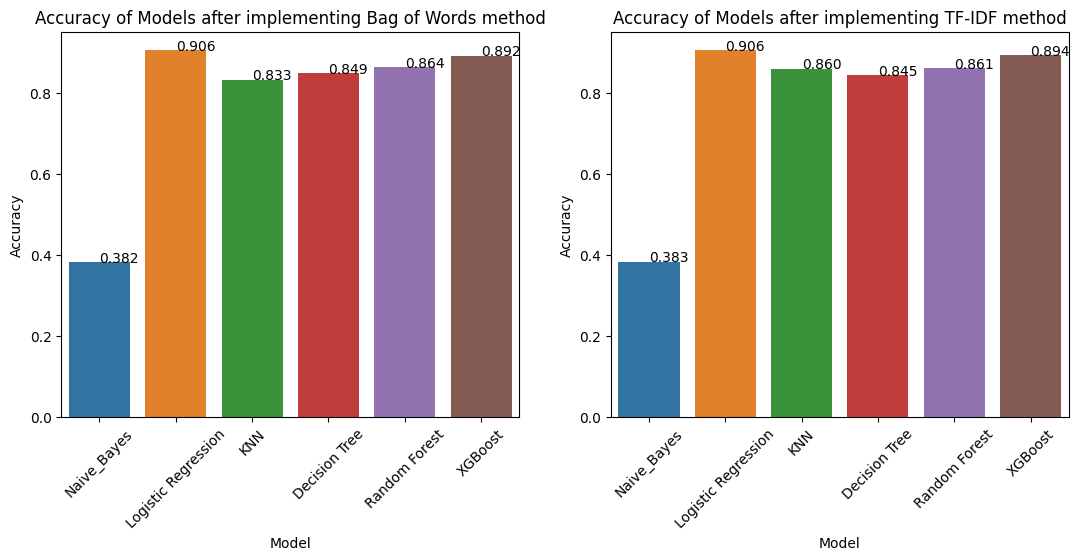

In [51]:
bow = [acc, score1, score2, score3, score4, score5]
tfidfs = [acc1, score11, score22, score33, score44, score55]
models = ['Naive_Bayes','Logistic Regression','KNN','Decision Tree','Random Forest','XGBoost']

fig,(a,b) = plt.subplots(1,2,figsize=(13,5))

sns.barplot(x=models,y=bow,ax=a)
a.set_title('Accuracy of Models after implementing Bag of Words method')
a.set_xlabel('Model')
a.set_ylabel('Accuracy')
for index,data in enumerate(bow):
  a.text(x=index,y=data,s=f'{data:.3f}')



sns.barplot(x=models, y=tfidfs, ax=b)
b.set_title('Accuracy of Models after implementing TF-IDF method')
b.set_xlabel('Model')
b.set_ylabel('Accuracy')
for index,data in enumerate(tfidfs):
  b.text(x=index,y=data,s=f'{data:.3f}')

a.set_xticklabels(models, rotation=45)
b.set_xticklabels(models, rotation=45);

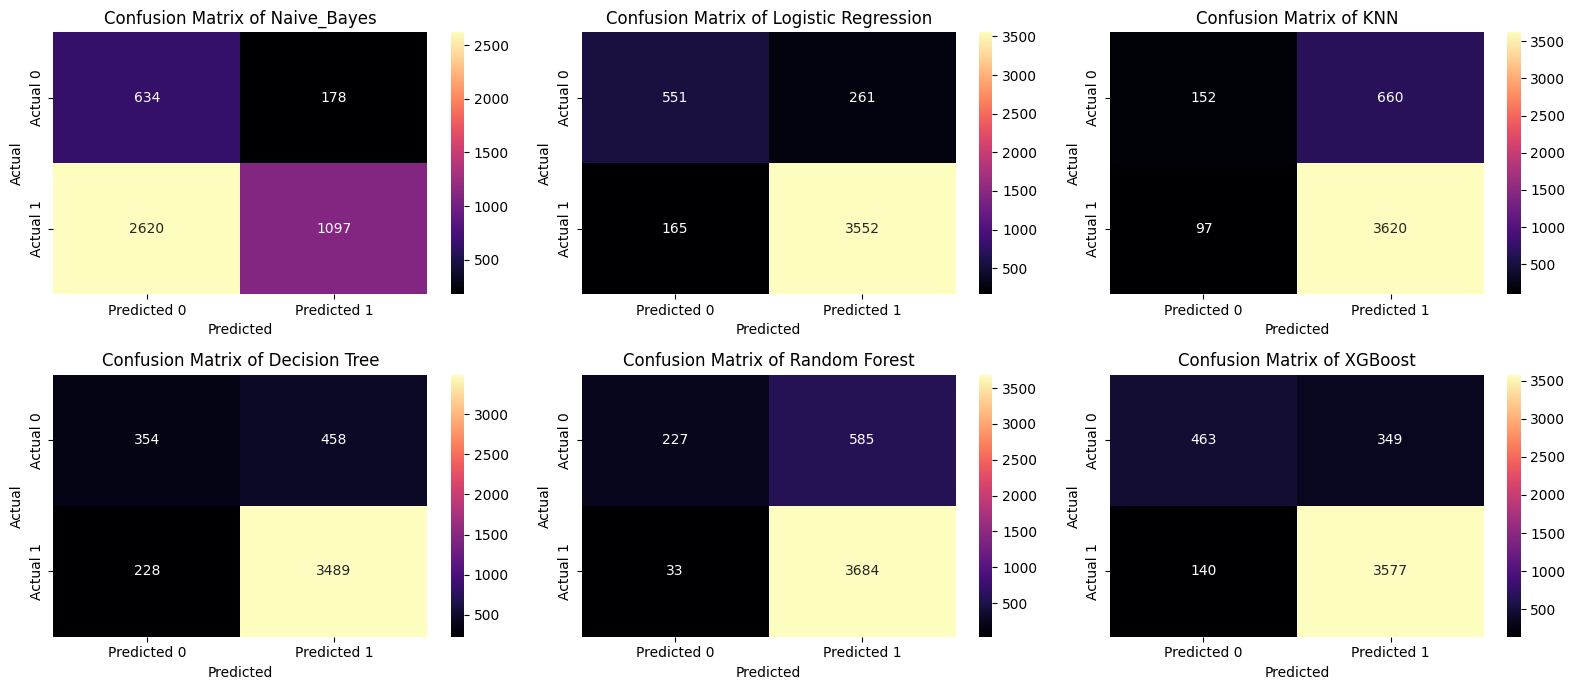

In [50]:
confusion_matrixx = [cm0,cm1,cm2,cm3,cm4,cm5]
models = models
cmaps = ['magma']

plt.figure(figsize=(16,7))


for i,col in enumerate(confusion_matrixx):
  plt.subplot(2,3,i+1)
  sns.heatmap(col,annot=True,cmap='magma',xticklabels=['Predicted 0', 'Predicted 1'],yticklabels=['Actual 0', 'Actual 1'],fmt='d')
  plt.title(f'Confusion Matrix of {models[i]}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
plt.tight_layout()

### EDA (Rough)

In [200]:
dataset.sample(3)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1410,1081,45,4,1,2,General,Dresses,Dresses
19050,878,57,5,1,0,General Petite,Tops,Knits
18910,1086,29,5,1,0,General,Dresses,Dresses


In [62]:
# dataset.drop(columns =['Unnamed: 0','Title','Review Text'],inplace=True)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
14996,1097,35,2,0,15,General Petite,Dresses,Dresses
18575,1063,51,5,1,0,General,Bottoms,Pants
16318,1078,82,4,1,0,General Petite,Dresses,Dresses
16073,1068,50,3,0,0,General Petite,Bottoms,Pants
12408,863,36,5,1,2,General,Tops,Knits


In [104]:
dataset.dropna(inplace=True)

Text(0, 0.5, 'Count')

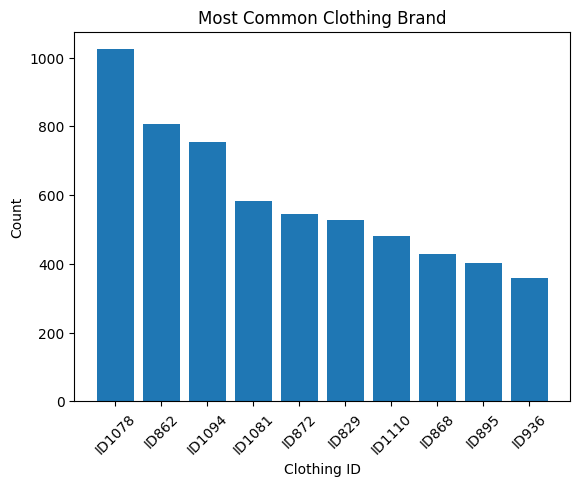

In [105]:
a= dataset['Clothing ID'].value_counts().head(10).reset_index()
a['index']= a['index'].astype(str)
a['index']=  "ID" + a['index']
plt.bar(x= a['index'],height = a['Clothing ID'])
plt.title('Most Common Clothing Brand')
plt.xticks(rotation=45)
plt.xlabel('Clothing ID')
plt.ylabel("Count")

<ipython-input-100-c13b6c0841f7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'])


<Axes: xlabel='Age', ylabel='Density'>

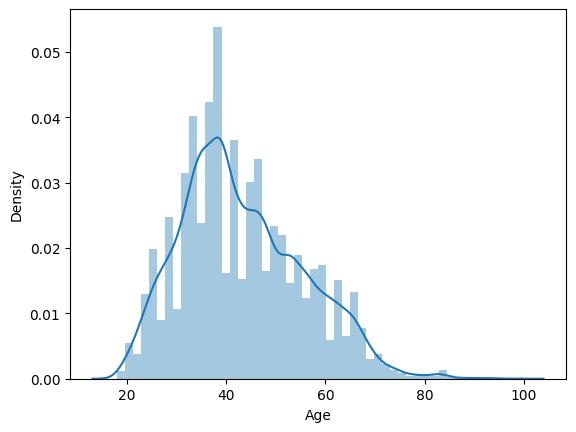

In [100]:
sns.distplot(dataset['Age'])

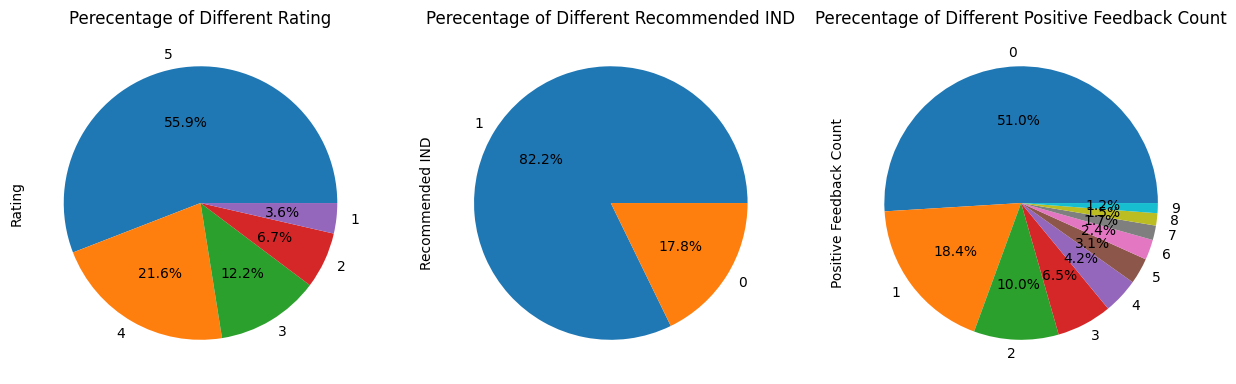

In [119]:
listy = ['Rating','Recommended IND','Positive Feedback Count']
plt.figure(figsize=(15,5))
for i,col in enumerate(listy):
  plt.subplot(1,3,i+1)
  dataset[col].value_counts().head(10).plot.pie(autopct='%.1f%%')
  plt.title(f'Perecentage of Different {col}')

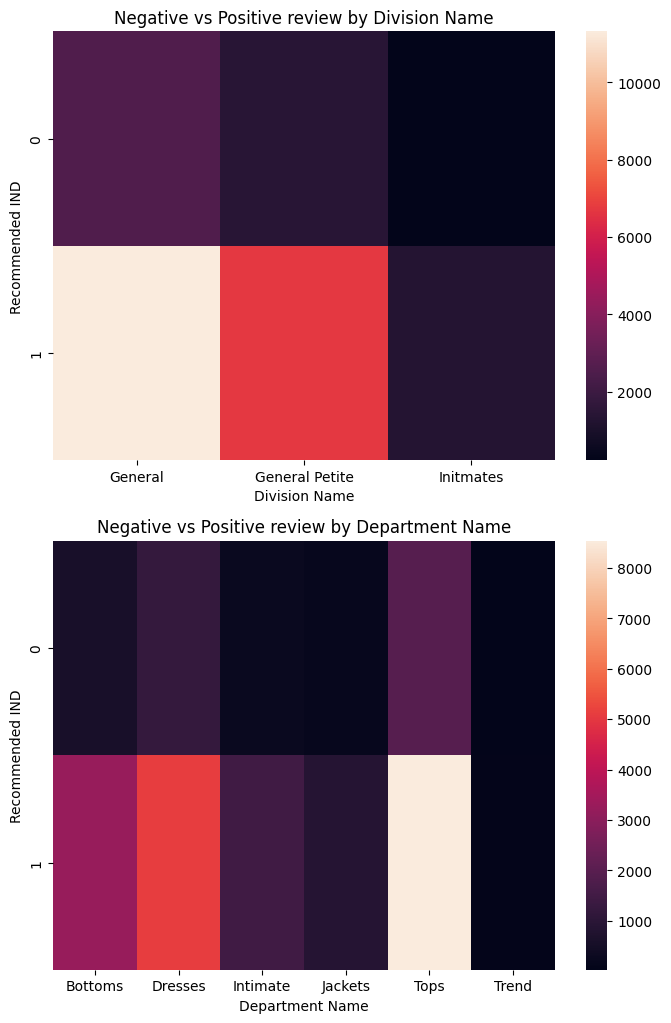

In [202]:
listz=['Division Name','Department Name']
plt.figure(figsize=(7,15))
for i,col in enumerate(listz):
  plt.subplot(3,1,i+1)
  c = dataset.groupby('Recommended IND')[col].value_counts().reset_index(name='Count')
  c = c.pivot_table(index='Recommended IND',columns= col ,values='Count')
  sns.heatmap(c)
  plt.title(f'Negative vs Positive review by {col}')
plt.tight_layout()

<Axes: xlabel='Class Name', ylabel='Recommended IND'>

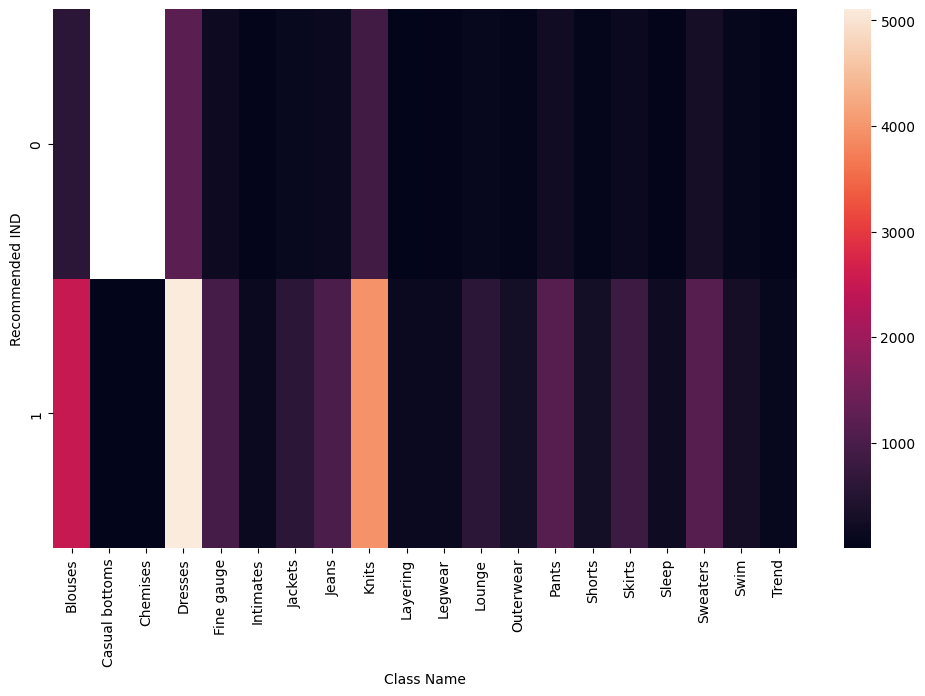

In [161]:
b = dataset.groupby('Recommended IND')['Class Name'].value_counts().reset_index(name='Count')
b = b.pivot_table(index='Recommended IND',columns= 'Class Name',values='Count')
plt.figure(figsize=(12,7))
sns.heatmap(b)

<Axes: xlabel='Division Name-Department Name', ylabel='Recommended IND'>

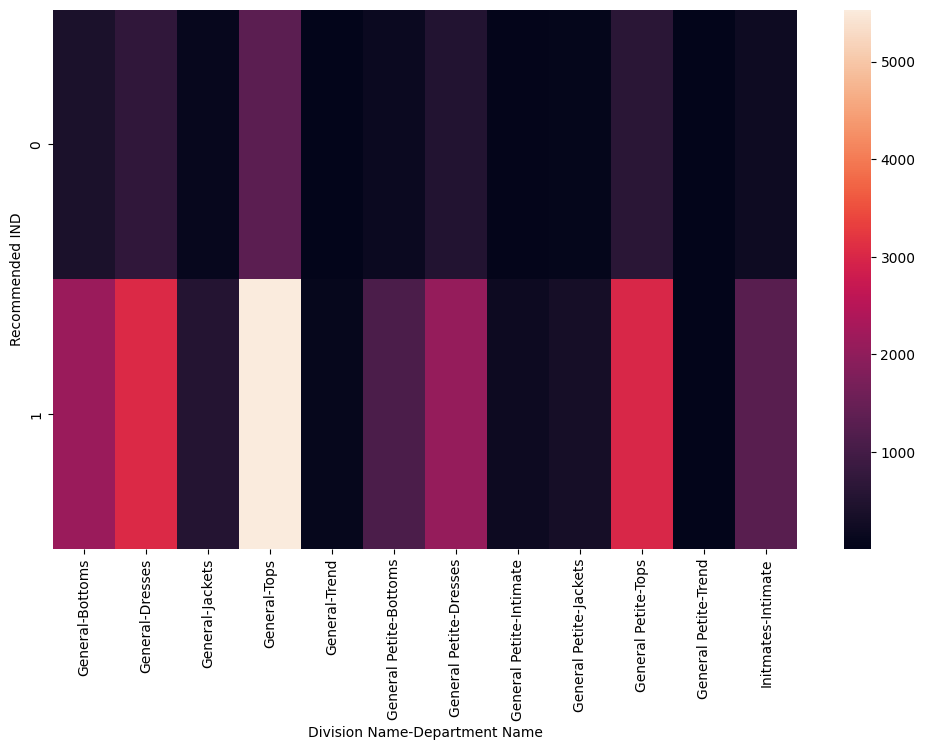

In [168]:
z = dataset.groupby(['Division Name','Department Name'])['Recommended IND'].value_counts().reset_index(name='Count')
z = z.pivot_table(columns=['Division Name','Department Name'],index= 'Recommended IND',values='Count')
plt.figure(figsize=(12,7))
sns.heatmap(z)

In [106]:
dataset.sample(3)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
4095,1098,34,4,1,0,General Petite,Dresses,Dresses
16490,123,43,5,1,0,Initmates,Intimate,Sleep
9848,1056,42,3,0,1,General,Bottoms,Pants


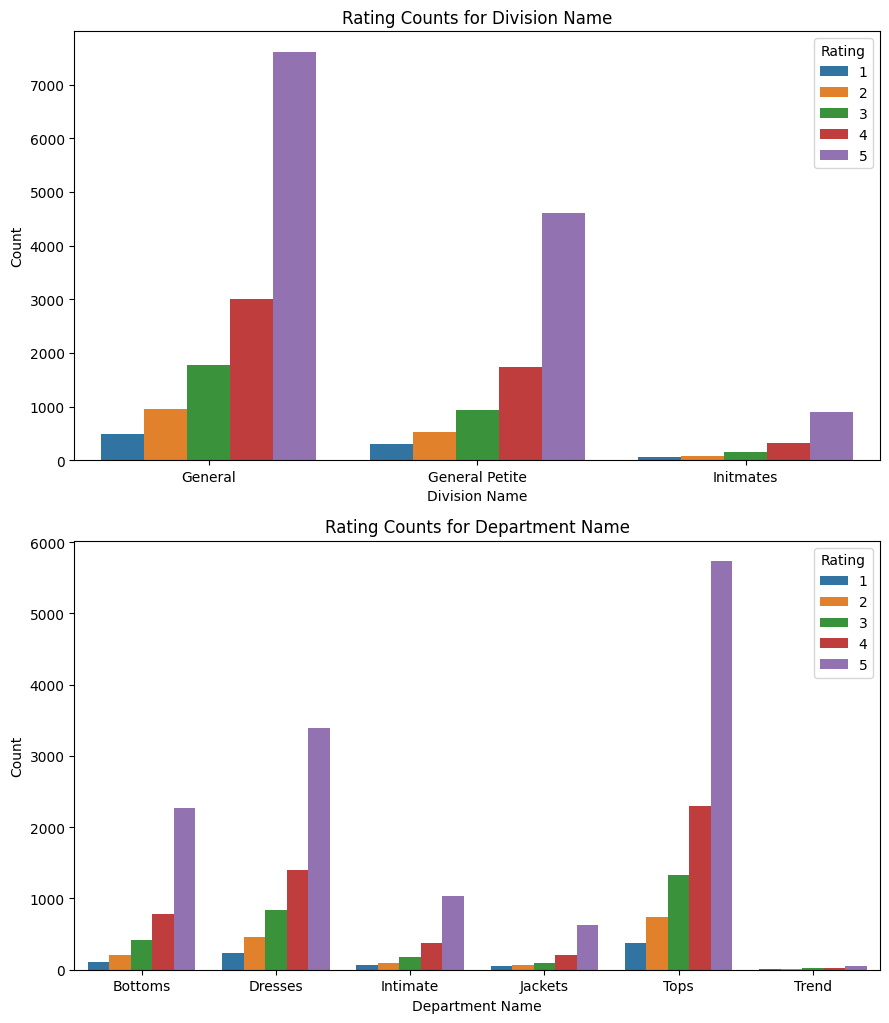

In [194]:
listz=['Division Name','Department Name']
plt.figure(figsize=(9,15))
for i,col in enumerate(listz):
  plt.subplot(3,1,i+1)
  c = dataset.groupby(col)['Rating'].value_counts().reset_index(name='count')
  sns.barplot(x=c[col],y=c['count'],hue=c['Rating'])
  plt.title(f'Rating Counts for {col}')
  plt.xlabel(col)
  plt.ylabel('Count')

plt.tight_layout()

<ipython-input-199-8cdc0f897b39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


<Axes: >

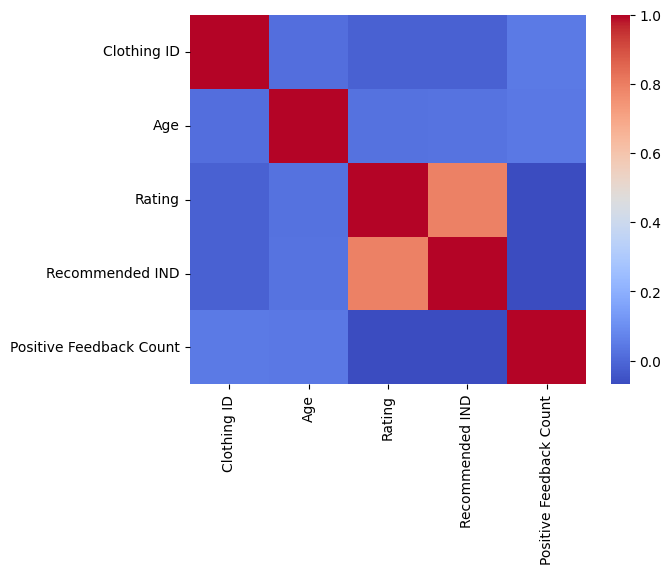

In [199]:
corr = dataset.corr()
sns.heatmap(corr,cmap='coolwarm')